# Cwatershed - watershed from markers - usage illustration

In [1]:
import numpy as np
import ia870 as MT
from PIL import Image

## Example 1, numerical

In [2]:
a = np.array([[10,   10,   10,   10,   10,   10,   10],\
              [10,    9,    6,   18,    6,    5,   10],\
              [10,    9,    6,   18,    6,    8,   10],\
              [10,    9,    9,   15,    9,    9,   10],\
              [10,    9,    9,   15,   12,   10,   10],\
              [10,   10,   10,   10,   10,   10,   10]],
                dtype = np.uint8)
b = (a == 6)
print('b=\n',b * 1)
print('ws Lines:\n',  MT.iacwatershed(a, b, MT.iasecross()) *1 )
print('ws Regions:\n',MT.iacwatershed(a, b, MT.iasecross(),'REGIONS'))

b=
 [[0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
ws Lines:
 [[0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]]
ws Regions:
 [[1 1 1 1 2 2 2]
 [1 1 1 1 2 2 2]
 [1 1 1 1 2 2 2]
 [1 1 1 1 2 2 2]
 [1 1 1 1 2 2 2]
 [1 1 1 1 2 2 2]]


## Example 2 - image

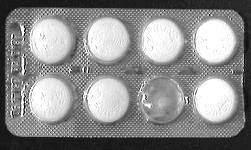

In [3]:
f_pil = Image.open('data/astablet.tif')
f_pil

### gradient image

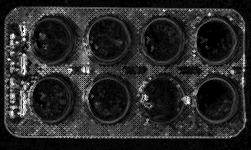

In [4]:
f = np.array(f_pil)
grad = MT.iagradm(f)
Image.fromarray(grad)

### Markers from Filtered Regional Minima

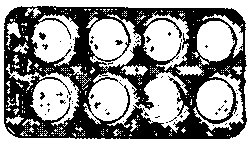

In [12]:
mark = MT.iaregmin(MT.iahmin(grad,35))
Image.fromarray(mark.astype(np.uint8)*255)

### Watershed from markers

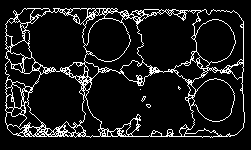

In [13]:
w = MT.iacwatershed(grad,mark)
Image.fromarray(w.astype(np.uint8)*255)

### shown as labeled regions

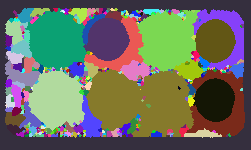

In [19]:
wlabel = MT.iacwatershed(grad,mark, MT.iasecross(), 'REGIONS')
Image.fromarray(MT.iaglblshow(wlabel).transpose(1,2,0))

## Reference

R. Lotufo and A. Falcão, "The ordered queue and the optimality of the watershed approaches", in Proceedings of the 5th International Symposium on Mathematical Morphology and its Applications to Image and Signal Processing, vol. 18. Kluwer Academic Publishers, June 2000, pp. 341–350.